- [Imports](#Imports)
- [Data](#Data)
- [Pitcher Overview](#Pitcher-Overview)
    - [Pitch Usage](#Pitch-Usage)
    - [Pitch Usage by Batter Handedness](#Pitch-Usage-by-Batter-Handedness)
    - [Velocity by Pitch Type](#Velocity-by-Pitch-Type)
- [Pitcher Stuff](#Pitcher-Stuff)
    - [Spin Axis](#Spin-Axis)
    - [Velocity & Spin Rate](#Velocity-&-Spin-Rate)
    - [HB & VB Axis](#Horizontal-&-Vertical-Break-Axis)
    - [Release Position](#Release-Postion)
- [Count Breakdown](#Count-Breakdown)
    - [Pitch Usage by Count](#Pitch-Usage-by-Count)
- [Pitch Locations](#Pitch-Locations)
    - [Balls-&Strikes-from-Hitters' Perspective - All-Pitches](#Balls-&-Strikes-from-Hitters'-Perspective--All-Pitches)
- [Heatmaps](#Heatmaps)
    - [Fastball Heatmaps](#Fastball-Heatmaps)
    - [Split-Finger Heatmaps](#Split--Finger-Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)

# Imports

In [1]:
from math import radians
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data 

In [2]:
doolittle = pd.read_csv('../data/sean-doolittle.csv')
doolittle.drop(columns = ['Unnamed: 0'], inplace = True)
doolittle.dropna(subset = ['pitch_type'], inplace = True)

# Font Dictionary
font_title = {
    'size': 14,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(doolittle.shape)
doolittle.head(2)

(1074, 90)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,bauer_units,swing_miss
0,FF,2019-09-28,93.3,2.31,5.92,"Doolittle, Sean",475247,448281,out,hit_into_play,12.0,Ryan Flaherty pops out to shortstop Trea Turner.,R,L,L,WSH,CLE,X,6.0,popup,1,2,2019,0.22,19.80,0.32,3.87,NaN,NaN,NaN,2,9,Top,128.1,162.38,543228,-5.627512,-135.746020,-3.139576,4.014464,31.914404,-11.188363,3.72,1.78,NaN,80.0,69.0,93.5,2254.0,6.6,565974,448281,543228,475582,452678,543685,607208,665742,572191,467827,53.94,0.0,0.0,0.0,1.0,0.0,0.0,3.0,80,4,4-Seam Fastball,10,7,7,10,7,10,7,10,Standard,Standard,173.0,0.004,-0.081,1,1-2,-0.32,-2.64,24.158628,0
1,FF,2019-09-28,93.1,2.28,5.92,"Doolittle, Sean",475247,448281,NaN,called_strike,5.0,Ryan Flaherty pops out to shortstop Trea Turner.,R,L,L,WSH,CLE,S,NaN,NaN,1,1,2019,0.41,20.04,-0.24,2.82,NaN,NaN,NaN,2,9,Top,NaN,NaN,543228,-7.394281,-135.267352,-5.850137,6.771844,30.717113,-10.534932,3.66,1.70,NaN,NaN,NaN,93.2,2224.0,6.5,565974,448281,543228,475582,452678,543685,607208,665742,572191,467827,53.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,3,4-Seam Fastball,10,7,7,10,7,10,7,10,Standard,Standard,166.0,0.000,-0.028,1,1-1,0.24,-4.92,23.888292,0


In [3]:
doolittle.groupby('pitch_type').mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,bauer_units,swing_miss
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FF,93.455649,2.163780,5.960866,562800.888068,448281.0,7.640971,5.386473,0.826822,0.990496,2019.0,0.315502,19.597128,-0.024308,3.000982,531376.583333,556953.917051,546038.288690,1.121436,8.898627,118.311899,109.560506,498941.583949,-6.289576,-135.873413,-5.420283,5.189318,28.230766,-11.171458,3.372587,1.596294,201.116352,83.516817,30.495495,93.177297,2214.995776,6.056072,566136.929250,448281.0,498941.583949,502857.578669,544931.686378,535448.554382,606837.761352,651940.713833,632664.333685,584618.800422,54.443041,0.323462,0.396667,0.332543,0.99569,0.198276,0.193966,3.493590,72.017951,3.087645,4.292503,4.067582,3.240760,5.119324,4.085533,4.309398,3.275607,5.119324,169.105597,-0.000472,-0.002592,0.712777,0.024308,-3.786019,23.700277,0.120380
FS,83.710769,2.600308,5.640462,566905.046154,448281.0,11.030769,4.818182,0.707692,1.369231,2019.0,1.134923,16.000615,0.446154,1.814308,NaN,554196.750000,552848.200000,1.123077,9.000000,106.582500,109.132500,486908.830769,-7.136146,-121.623140,-4.997086,12.508518,22.350507,-18.320675,3.338000,1.587385,162.444444,77.838889,23.111111,83.435385,2136.307692,6.049231,566125.938462,448281.0,486908.830769,501334.600000,535823.276923,537813.553846,607290.369231,653562.615385,638553.292308,567059.092308,54.448615,0.355000,0.370750,0.420833,1.00000,0.250000,0.333333,3.125000,72.569231,3.753846,4.046154,4.015385,3.092308,4.969231,4.030769,4.046154,3.107692,4.969231,139.630769,-0.012369,0.019600,0.600000,-0.446154,-13.619077,25.521243,0.123077
SL,80.935484,2.572258,5.760968,543587.193548,448281.0,9.370968,5.000000,0.467742,1.241935,2019.0,-0.725161,2.856774,-0.736129,2.087097,550512.000000,574958.166667,535637.933333,0.967742,8.693548,117.048889,122.774444,508825.435484,-5.956534,-117.684626,-2.028781,-5.553376,20.474316,-29.837727,3.304516,1.569194,175.857143,74.620000,27.133333,80.167742,2423.822222,5.619355,566109.225806,448281.0,508825.435484,500193.096774,535756.822581,541933.016129,605333.709677,658213.564516,636543.451613,584963.629032,54.886774,0.259222,0.244222,0.138462,1.00000,0.153846,0.000000,2.666667,70.064516,3.258065,4.483871,4.064516,3.403226,5.145161,4.064516,4.483871,3.403226,5.145161,252.419355,0.000097,-0.022871,0.564516,0.736129,8.701935,29.929440,0.193548


In [4]:
#doolittle.pitch_type.value_counts(normalize=True)
r_doolittle = doolittle.loc[(doolittle['player_name'] == 'Doolittle, Sean') & (doolittle['stand'] == 'R')].copy()
l_doolittle = doolittle.loc[(doolittle['player_name'] == 'Doolittle, Sean') & (doolittle['stand'] == 'L')].copy()
# all hitters
ff = doolittle.loc[doolittle['pitch_type'] == 'FF']
fs = doolittle.loc[doolittle['pitch_type'] == 'FS']
sl = doolittle.loc[doolittle['pitch_type'] == 'SL']
# RHH
r_ff = r_doolittle.loc[r_doolittle['pitch_type'] == 'FF']
r_fs = r_doolittle.loc[r_doolittle['pitch_type'] == 'FS']
r_sl = r_doolittle.loc[r_doolittle['pitch_type'] == 'SL']
# LHH
l_ff = l_doolittle.loc[l_doolittle['pitch_type'] == 'FF']
l_fs = l_doolittle.loc[l_doolittle['pitch_type'] == 'FS']
l_sl = l_doolittle.loc[l_doolittle['pitch_type'] == 'SL']
order = ['FF', 'FS', 'SL']

# Pitcher Overview

### Pitch Usage

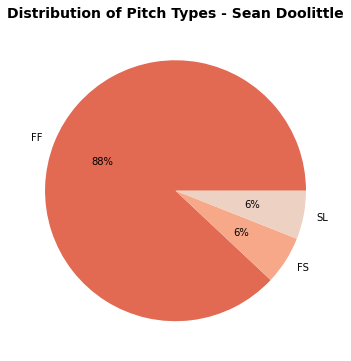

In [5]:
plt.figure(figsize = (8, 6))

dist = round(doolittle.pitch_type.value_counts(normalize = True), 2)
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = order, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Sean Doolittle', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

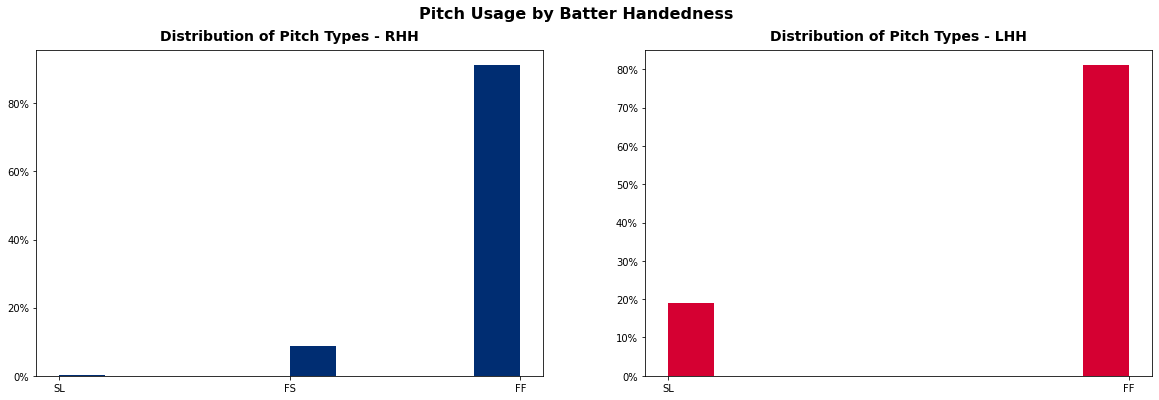

In [6]:
blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 16, fontweight = 'bold')

dist_r = r_doolittle.pitch_type.sort_values(ascending = False)
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)

dist_l = l_doolittle.pitch_type.sort_values(ascending = False)
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

4-Seam velo sits: 93 - 94 mph,  max: 96.4 mph
Split-Finger velo sits: 83 - 84 mph,  max: 85.9 mph
Slider velo sits: 80 - 82 mph,  max: 83.3 mph


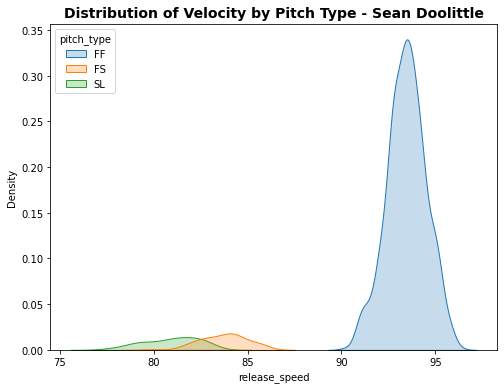

In [7]:
plt.figure(figsize = (8, 6))

ax = sns.kdeplot(data = doolittle, x = 'release_speed', shade = 'fill', hue = 'pitch_type',
            hue_order = order, palette = 'tab10')
sns.move_legend(ax, 'upper left')
plt.title('Distribution of Velocity by Pitch Type - Sean Doolittle', fontdict = font_title, pad = 12)
print('4-Seam velo sits:',round(ff['release_speed'].quantile(.25)),'-',round(ff['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ff['release_speed'].max(), 2), 'mph')
print('Split-Finger velo sits:',round(fs['release_speed'].quantile(.25)),'-',
      round(fs['release_speed'].quantile(.75)),'mph, ','max:',round(fs['release_speed'].max(), 2),'mph')
print('Slider velo sits:',round(sl['release_speed'].quantile(.25)),'-',round(sl['release_speed'].quantile(.75)), 
      'mph, ','max:',round(sl['release_speed'].max(),2),'mph');

### Pitch Velocity by Pitch Number

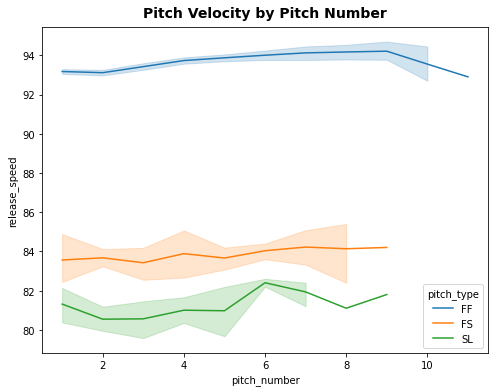

In [8]:
plt.figure(figsize = (8, 6))

sns.lineplot(data = doolittle, x = 'pitch_number', y = 'release_speed', hue = 'pitch_type',
             hue_order = order, palette = 'tab10')
plt.title('Pitch Velocity by Pitch Number', fontdict = font_title, pad = 15);

# Pitcher Stuff

### Spin Axis

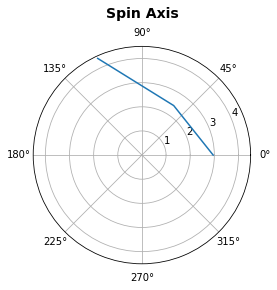

In [9]:
spin_axis = doolittle.groupby(['pitch_type']).mean()
ax = plt.subplot(polar = True)
ax.plot([radians(x) for x in spin_axis['spin_axis'].values])
ax.set_title('Spin Axis', fontdict = font_title, pad = 15);

### Spin Rate by Pitch Type

4-Seam spin rate: 2174 - 2262 rpm, max: 2392.0 rpm
Split-Finger spin rate: 2096 - 2201 rpm, max: 2370.0 rpm
Slider spin rate: 2363 - 2494 rpm, max: 2624.0 rpm


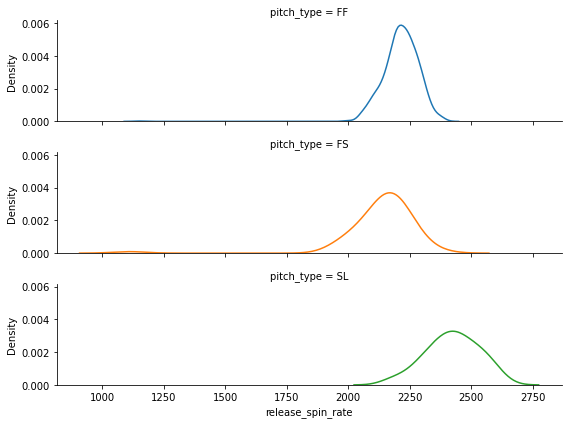

In [10]:
g = sns.FacetGrid(doolittle, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, );
g.map(sns.kdeplot, 'release_spin_rate', palette = 'tab10')


print('4-Seam spin rate:',round(ff['release_spin_rate'].quantile(.25)),'-',
      round(ff['release_spin_rate'].quantile(.75)),'rpm,','max:', round(ff['release_spin_rate'].max(), 2), 'rpm')


print('Split-Finger spin rate:',round(fs['release_spin_rate'].quantile(.25)),'-',
      round(fs['release_spin_rate'].quantile(.75)), 'rpm,','max:',round(fs['release_spin_rate'].max(), 2),'rpm')

print('Slider spin rate:',round(sl['release_spin_rate'].quantile(.25)),
      '-',round(sl['release_spin_rate'].quantile(.75)),'rpm,',
      'max:',round(sl['release_spin_rate'].max(),2),'rpm');

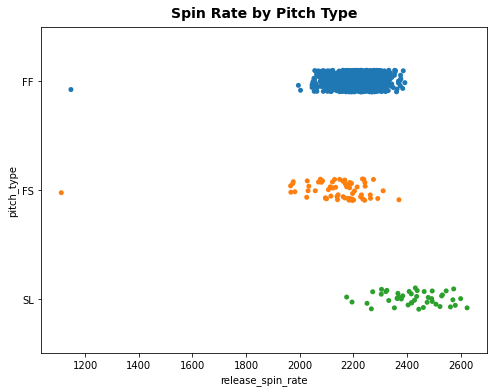

In [11]:
plt.figure(figsize = (8, 6))
sns.stripplot(data = doolittle, x = 'release_spin_rate', y = 'pitch_type')
plt.title('Spin Rate by Pitch Type', fontdict = font_title, pad = 15);

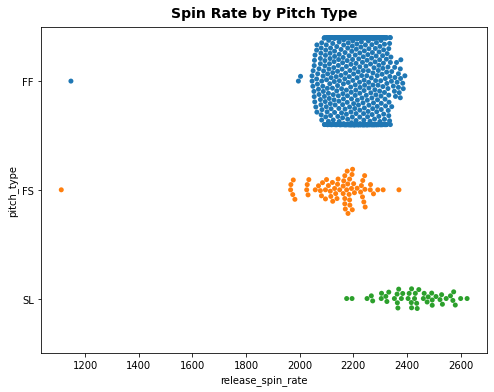

In [12]:
plt.figure(figsize = (8, 6))
sns.swarmplot(data = doolittle, x = 'release_spin_rate', y = 'pitch_type')
plt.title('Spin Rate by Pitch Type', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Axis

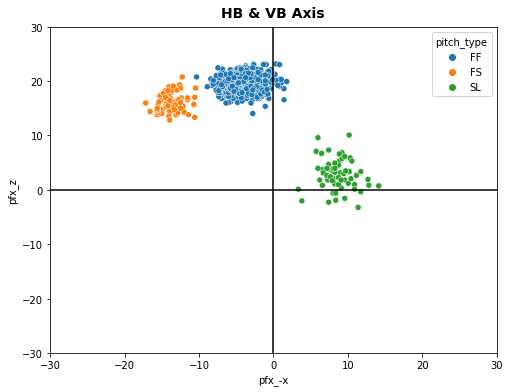

In [13]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = doolittle, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black'), plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

### Velocity & Spin Rate

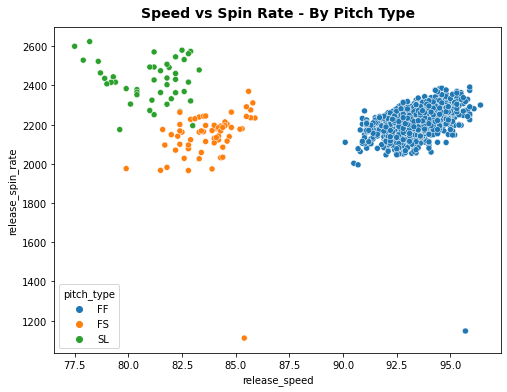

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = doolittle, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.title('Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Release Postion

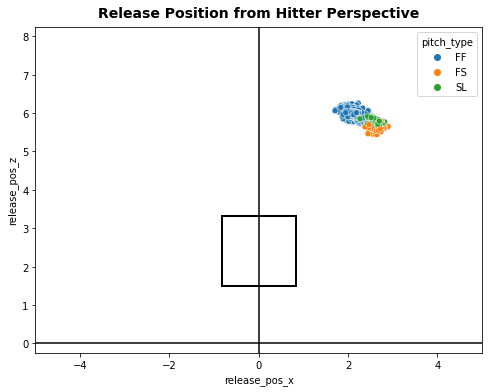

In [15]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = doolittle, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                 hue_order = order, palette = 'tab10')
plt.xlim(-5, 5), plt.ylim(-0.25, 8.25)
plt.axvline(0, color = 'black'), plt.axhline(0, color = 'black')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

### Bauer Units

4-Seam Avg Bauer Units: 23.7
Split-Finger Avg Bauer Units: 25.52
Slider Avg Bauer Units: 29.93


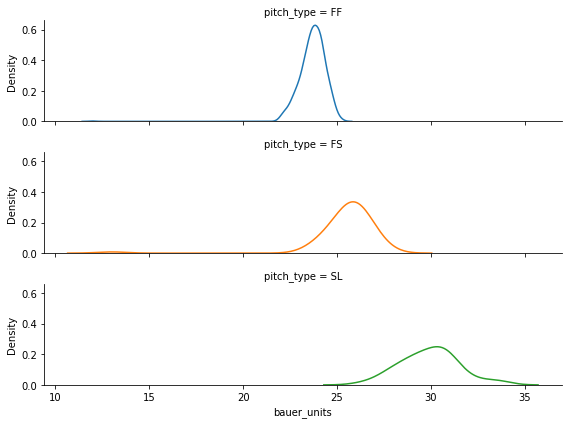

In [16]:
g = sns.FacetGrid(doolittle, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, )
g.map(sns.kdeplot, 'bauer_units', palette = 'tab10')
print('4-Seam Avg Bauer Units:', round(ff['bauer_units'].mean(), 2))
print('Split-Finger Avg Bauer Units:', round(fs['bauer_units'].mean(), 2))
print('Slider Avg Bauer Units:', round(sl['bauer_units'].mean(), 2))

# Count Breakdown

### Pitch Usage by Count

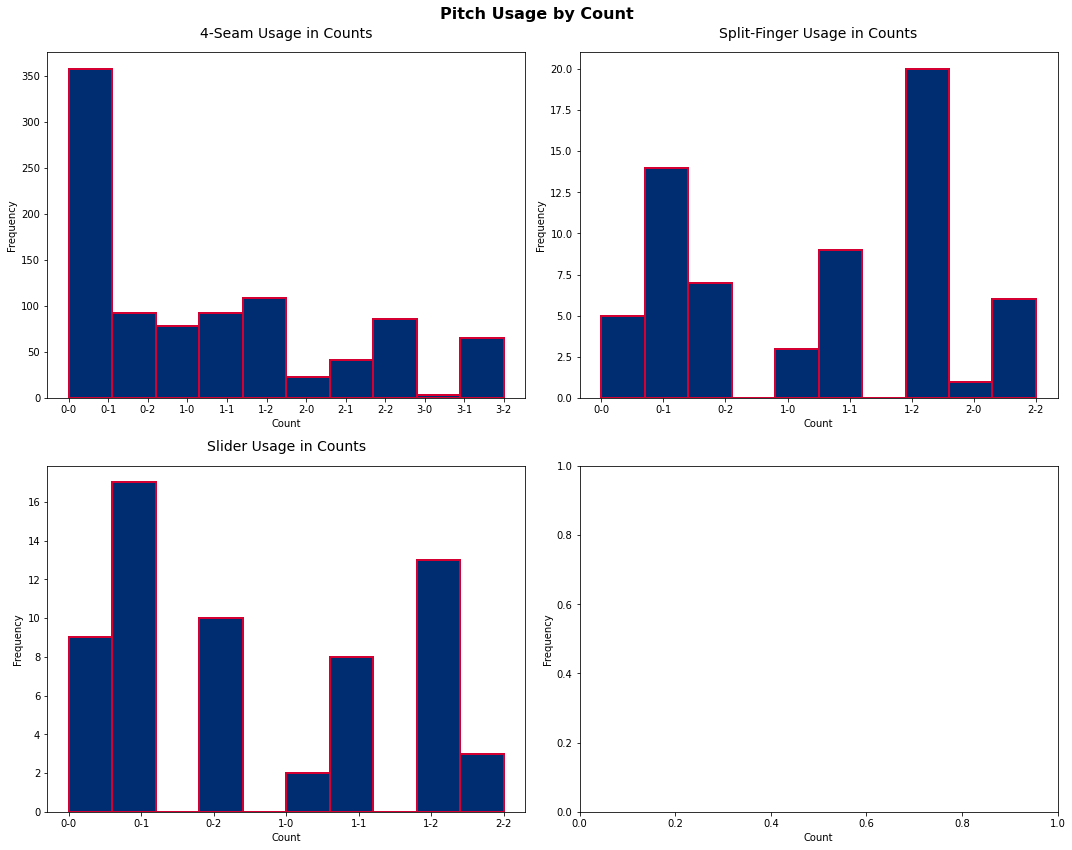

In [17]:
fig, axs = plt.subplots(2, 2, figsize = (15, 12))
fig.suptitle('Pitch Usage by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('4-Seam Usage in Counts', fontsize = 14, pad = 15)

axs[0][1].hist(fs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Split-Finger Usage in Counts', fontsize = 14, pad = 15)

axs[1][0].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Slider Usage in Counts', fontsize = 14, pad = 15)
plt.tight_layout();

# Pitch-Locations

### Balls & Strikes from Hitters' Perspective - All Pitches)

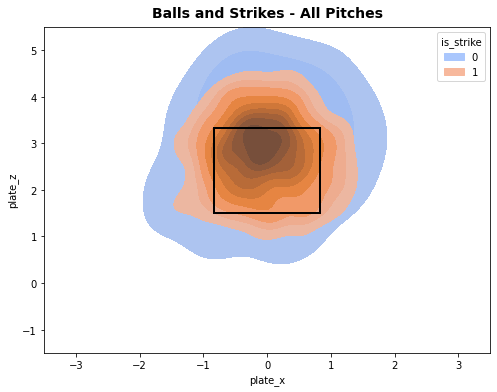

In [18]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = doolittle, x = 'plate_x', y = 'plate_z', fill = True, palette = 'coolwarm', hue = 'is_strike')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3.5, 3.5)
plt.ylim(-1.5, 5.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Pitch Location by Pitch Type

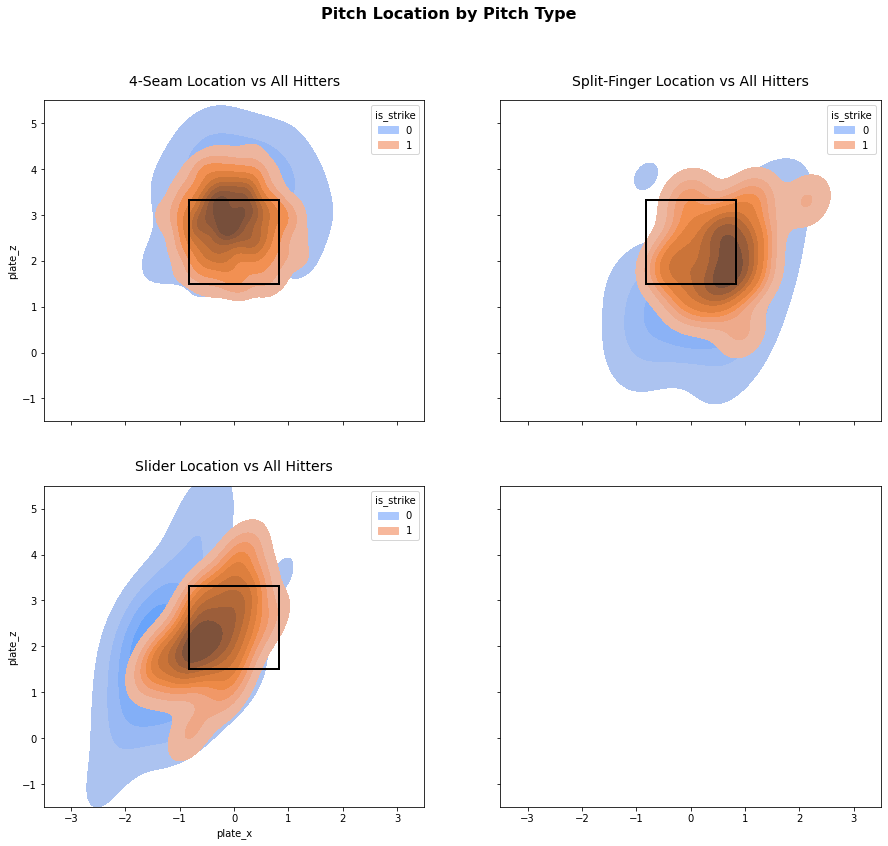

In [19]:
fig, axs = plt.subplots(2, 2, figsize = (15, 13), sharex = True, sharey = True)
fig.suptitle('Pitch Location by Pitch Type', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[0][1],data=fs,x='plate_x',y='plate_z',fill = True,hue='is_strike',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Split-Finger Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[1][0],data=sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Slider Location vs All Hitters', fontsize = 14, pad = 15);

# Heatmaps

### 4-Seam Heatmaps

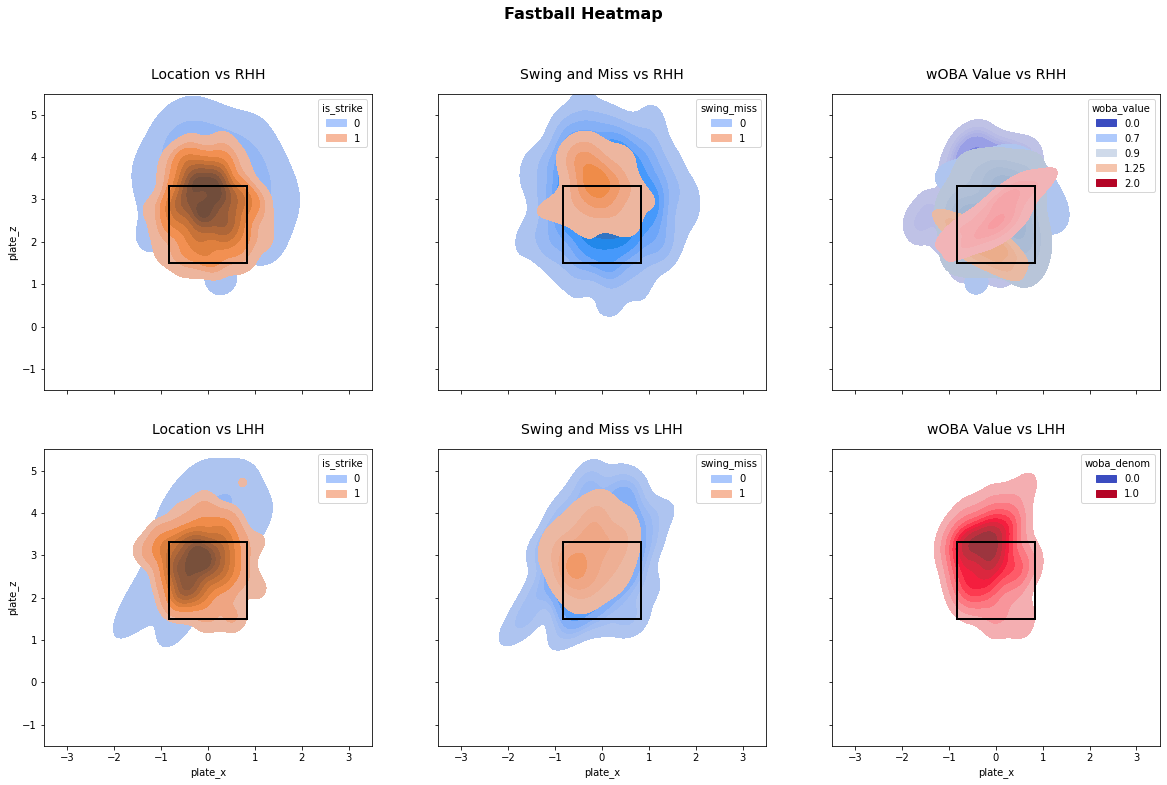

In [20]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_ff,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_ff,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='woba_denom',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 14, pad = 15);

### Split-Finger Heatmaps

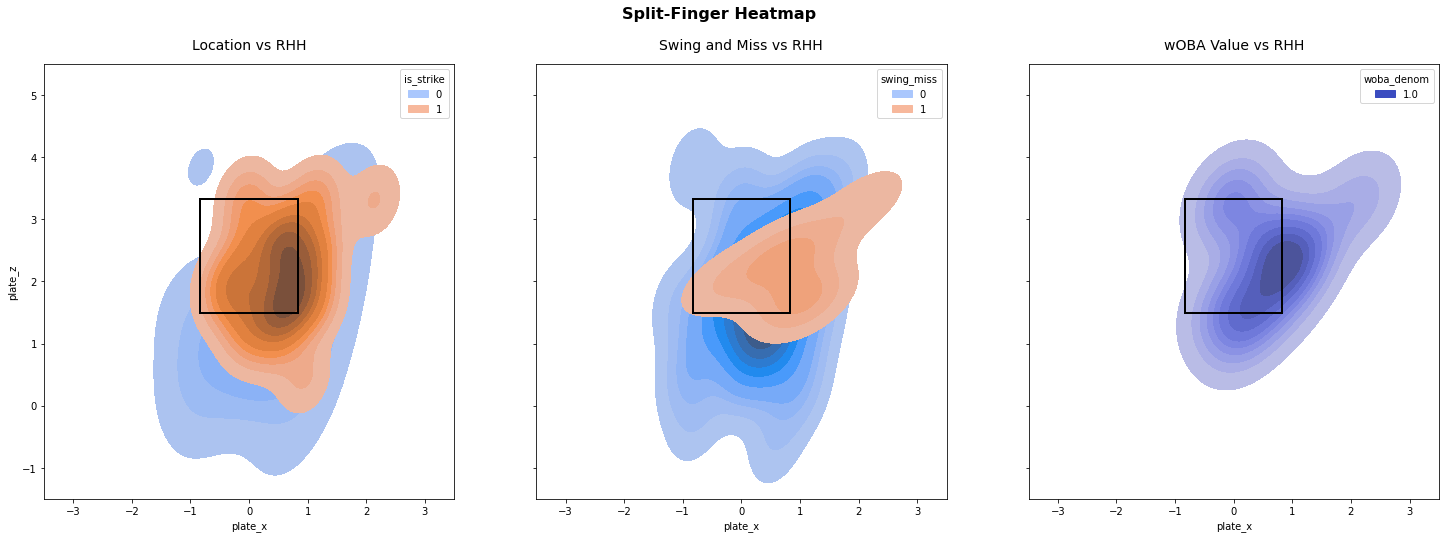

In [21]:
fig, axs = plt.subplots(1, 3, figsize = (25, 8), sharex = True, sharey = True)
fig.suptitle('Split-Finger Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0],data=r_fs,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1],data=r_fs,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[2],data=r_fs,x='plate_x',y='plate_z',fill=True,hue='woba_denom',palette='coolwarm')
axs[2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2].set_title('wOBA Value vs RHH', fontsize = 14, pad = 15);

### Slider Heatmaps

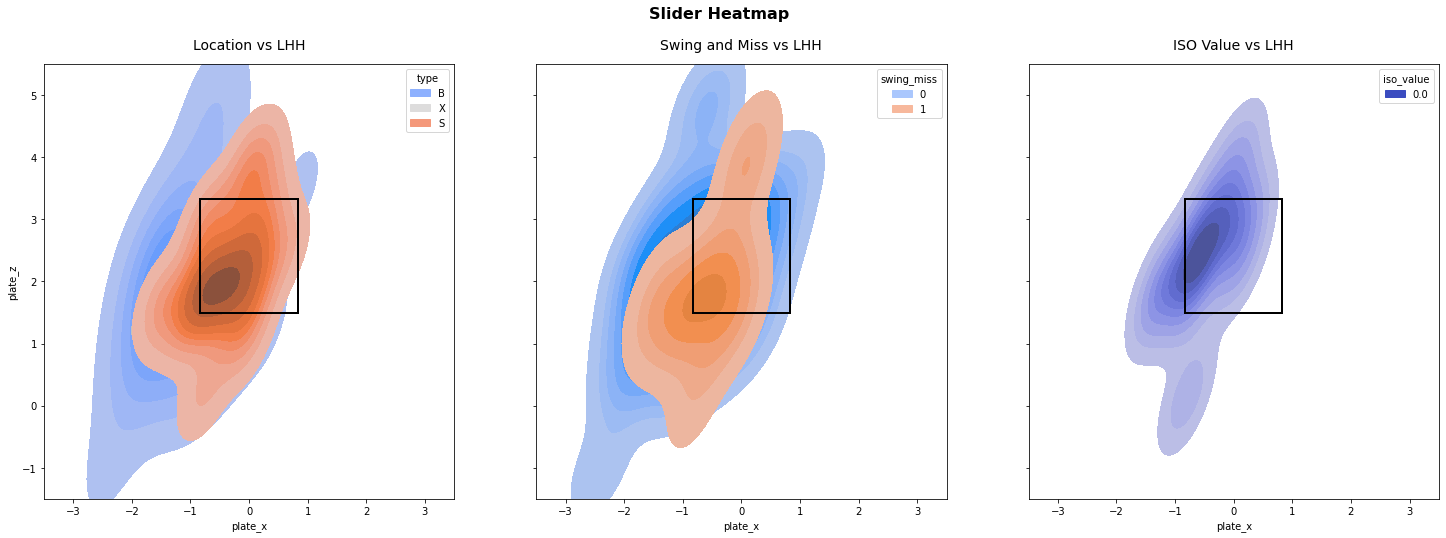

In [22]:
fig, axs = plt.subplots(1, 3, figsize = (25, 8), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='type',palette='coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1],data=l_sl,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[2],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='iso_value',palette='coolwarm')
axs[2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2].set_title('ISO Value vs LHH', fontsize = 14, pad = 15);